# Final project, Numerical Analysis 2022-2023


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [2]:
%matplotlib inline

# # input image dimensions
img_rows, img_cols = 28, 28

import numpy as np

arc = np.load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

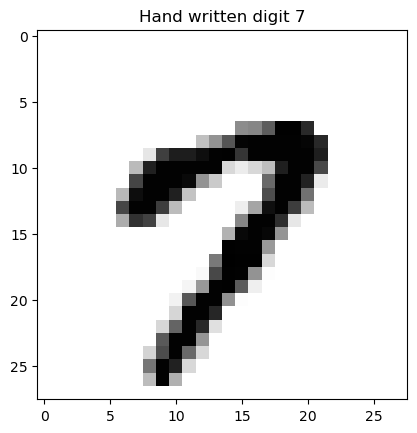

In [3]:
# Show image number 15, and write in the title what digit it should correspond to
from pylab import imshow, title
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [4]:
def d_infty(I1, I2):
    return np.max(np.abs(I2-I1)) # L_infty norm. Exploiting NumPy's vectorized operations that are highly optimized.

%timeit d_infty(x_train[0], x_train[1])

5.26 µs ± 319 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
def d_1(I1, I2):
    return np.sum(np.abs(I2-I1))    # L_1 norm

%timeit d_1(x_train[0], x_train[1])

5.54 µs ± 497 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
def d_2(I1, I2):
    return np.sqrt(np.sum((I2-I1)**2))  # L_2 norm

%timeit d_2(x_train[0], x_train[1])

6.2 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [7]:
def distance_matrix(X, N, dist_func):
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1, N):
            d = dist_func(X[i], X[j])
            D[i,j] = d
            D[j,i] = d  # D is symmetric
    return D

%timeit distance_matrix(x_train, 100, d_infty)
%timeit distance_matrix(x_train, 100, d_1)
%timeit distance_matrix(x_train, 100, d_2)

D_infty = distance_matrix(x_train, 100, d_infty)
D_1 = distance_matrix(x_train, 100, d_1)
D_2 = distance_matrix(x_train, 100, d_2)

29.4 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
35.9 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.5 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

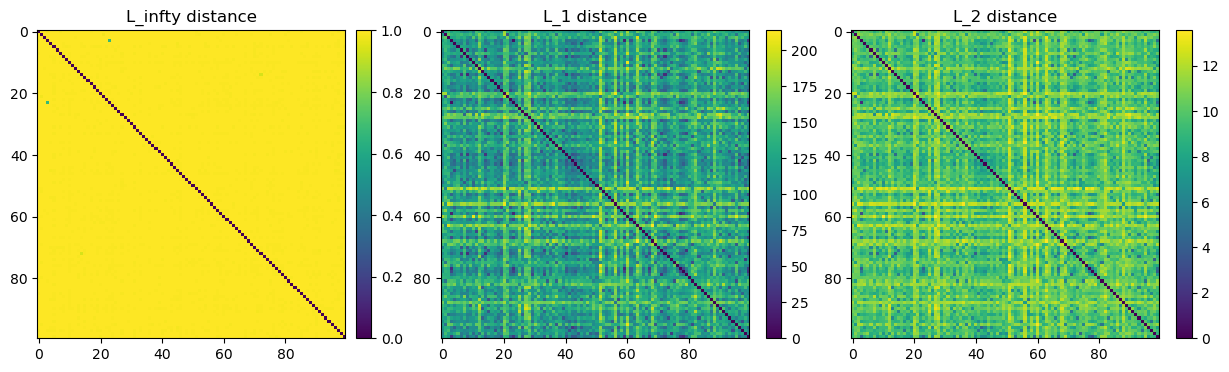

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.imshow(D_infty, cmap='viridis')
plt.colorbar(fraction=0.045, pad=0.03)
plt.title('L_infty distance')
plt.subplot(132)
plt.imshow(D_1, cmap='viridis')
plt.colorbar(fraction=0.045)
plt.title('L_1 distance')
plt.subplot(133)
plt.imshow(D_2, cmap='viridis')
plt.colorbar(fraction=0.045)
plt.title('L_2 distance')
plt.show()

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [9]:
class One_NN:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.N = len(X)
        
        # self.D = distance_matrix(X, self.N, dist_func)
    
    def classify(self, z, dist_func=d_infty):
        
        all_distances = np.array([dist_func(x, z) for x in self.X])
        digit = self.y[np.argmin(all_distances)]
        return digit
    
    def leave_one_out_error_rate_optimized(self, dist_func=d_infty):
        D = distance_matrix(self.X, self.N, dist_func)
        np.fill_diagonal(D, float('inf'))

        min_dist_indices = np.argmin(D, axis=1)
        error_mask = self.y[min_dist_indices] != self.y
        error_counter = np.count_nonzero(error_mask)
        
        error_rate = error_counter / self.N
        return error_rate

In [10]:
def leave_one_out_error_rate(D, y_train):
    N = D.shape[0]
    error_counter = 0
    
    for i in range(N):
        min_dist = float('inf')
        min_dist_idx = -1

        for j in range(N):
            if i == j:
                continue

            if D[i, j] < min_dist:
                min_dist = D[i, j]
                min_dist_idx = j

        if y_train[min_dist_idx] != y_train[i]:
            error_counter += 1

    error_rate = error_counter / N
    return error_rate

In [11]:
def leave_one_out_error_rate_optimized(D, y_train):
    N = D.shape[0]
    new_D = D.copy()
    np.fill_diagonal(new_D, float('inf'))

    min_dist_indices = np.argmin(new_D, axis=1)
    error_mask = y_train[min_dist_indices] != y_train
    error_counter = np.count_nonzero(error_mask)
    
    error_rate = error_counter / N
    return error_rate

In [12]:
%timeit leave_one_out_error_rate(D_infty, y_train[:100])
%timeit leave_one_out_error_rate_optimized(D_infty, y_train[:100])
print()
%timeit leave_one_out_error_rate(D_1, y_train[:100])
%timeit leave_one_out_error_rate_optimized(D_1, y_train[:100])
print()
%timeit leave_one_out_error_rate(D_2, y_train[:100])
%timeit leave_one_out_error_rate_optimized(D_2, y_train[:100])

1.86 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.8 µs ± 5.09 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

2.27 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
21.5 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

2.04 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
23.8 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
onenn = One_NN(x_train[:100], y_train[:100])

for _ in range(5):
    i = np.random.randint(len(x_test))
    print(f'Image {i}: label: {y_test[i]} - prediction: {onenn.classify(x_test[i])}')

Image 5571: label: 5 - prediction: 5
Image 5818: label: 0 - prediction: 0
Image 1047: label: 0 - prediction: 1
Image 2160: label: 6 - prediction: 6
Image 2816: label: 1 - prediction: 4


In [14]:
print('Leave one out with D_infty: ', onenn.leave_one_out_error_rate_optimized(dist_func=d_infty))
print('Leave one out with D_1: ', onenn.leave_one_out_error_rate_optimized(dist_func=d_1))
print('Leave one out with D_2: ', onenn.leave_one_out_error_rate_optimized(dist_func=d_2))

Leave one out with D_infty:  0.58
Leave one out with D_1:  0.17
Leave one out with D_2:  0.17


# Assignment 5
Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **

In [15]:
n_samples = [100, 200, 400, 800, 1600]
errors = []
for n in n_samples:
    onenn = One_NN(x_train[:n], y_train[:n])
    er1 = onenn.leave_one_out_error_rate_optimized(dist_func=d_infty)
    er2 = onenn.leave_one_out_error_rate_optimized(dist_func=d_1)
    er3 = onenn.leave_one_out_error_rate_optimized(dist_func=d_2)
    errors.append([er1, er2, er3])
    
print(np.array(errors))

[[0.58     0.17     0.17    ]
 [0.52     0.145    0.135   ]
 [0.4425   0.15     0.135   ]
 [0.4      0.145    0.12875 ]
 [0.369375 0.1025   0.09375 ]]


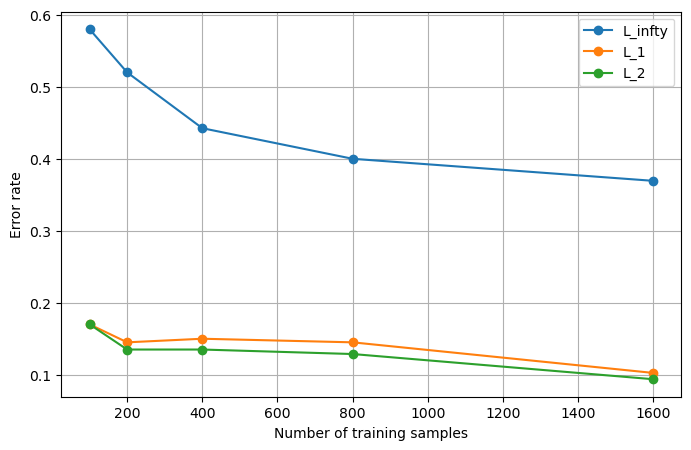

In [16]:
plt.figure(figsize=(8,5))
plt.plot(n_samples, errors, 'o-')

plt.legend(['L_infty', 'L_1', 'L_2'])
plt.xlabel('Number of training samples')
plt.ylabel('Error rate')
plt.grid()
plt.show()

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

### Discrete version

In [17]:
from scipy.integrate import simps
# def renormalize_image(f):
#     return f / simps(simps(f, axis=1), axis=0)

def renormalize_image(f):
    return f / np.sum(f)

def renormalized_images_matrix(X, renormalize_func):
    N = len(X)
    new_X = np.zeros((X.shape))
    for i in range(N):
        new_X[i] = renormalize_func(X[i])
    return new_X

def jacobian(X):
    N = len(X)
    Jx = np.zeros((X.shape))
    Jy = np.zeros((X.shape))
    
    for i in range(N):
        Jx[i], Jy[i] = np.array(np.gradient(X[i]))
    return Jx, Jy

def h1_distance(a, b, grad_a=None, grad_b=None, renormalized=False):
    
    if renormalized==False:
        a = renormalize_image(a)
        b = renormalize_image(b)
        
    if grad_a is None:
        grad_a = np.array(np.gradient(a))
        
    if grad_b is None:
        grad_b = np.array(np.gradient(b))
    
    grad_diff_sq = np.square((np.gradient(b - a)[0])) + np.square((np.gradient(b - a)[1]))
    intensity_diff_sq = np.square(b - a)
    
    # return np.sqrt(simps(simps(grad_diff_sq + intensity_diff_sq, axis=1), axis=0))
    return np.sqrt(np.sum(grad_diff_sq + intensity_diff_sq))

In [18]:
def h1_distance_matrix(X, N):
    
    normalized_x = renormalized_images_matrix(X[:N], renormalize_image)
    Jx, Jy = jacobian(normalized_x)

    dist_matrix_h1 = np.zeros((N, N))

    for i in range(N):
        for j in range(i + 1, N):
            d = h1_distance(normalized_x[i], normalized_x[j], (Jx[i], Jx[j]), (Jy[i], Jy[j]), renormalized=True)
            dist_matrix_h1[i, j] = d
            dist_matrix_h1[j, i] = d
            
    return dist_matrix_h1

%timeit h1_distance_matrix(x_train, 100)

964 ms ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [153]:
n_samples = [100, 200, 400, 800, 1600]
errors_h1 = []
dist_matrix_h1 = h1_distance_matrix(x_train, 1600)

for n in [100, 200, 400, 800, 1600]:
    errors_h1.append(leave_one_out_error_rate_optimized(dist_matrix_h1[:n, :n], y_train[:n]))
    
print(errors_h1)

[0.23, 0.175, 0.145, 0.12125, 0.099375]


### Augmented version

In [19]:
from scipy.interpolate import RegularGridInterpolator

i1 = x_train[0]
i2 = x_train[1]

# interpolate i1
x = np.arange(0, 28)
y = np.arange(0, 28)

f1 = RegularGridInterpolator((x, y), i1)
f2 = RegularGridInterpolator((x, y), i2)

In [20]:
x_new = np.linspace(0, 27, 100)
y_new = np.linspace(0, 27, 100)
X_new, Y_new = np.meshgrid(x_new, y_new)
points = np.array([X_new, Y_new]).T

In [21]:
i1_new = f1(points)
i2_new = f2(points)

In [22]:
def augment_image(I):
    x = np.arange(0, I.shape[0])
    y = np.arange(0, I.shape[1])
    f = RegularGridInterpolator((x, y), I)
    x_new = np.linspace(0, I.shape[0]-1, 100)
    y_new = np.linspace(0, I.shape[0]-1, 100)
    X_new, Y_new = np.meshgrid(x_new, y_new)
    points = np.array([X_new, Y_new]).T
    I_new = f(points)
    return I_new

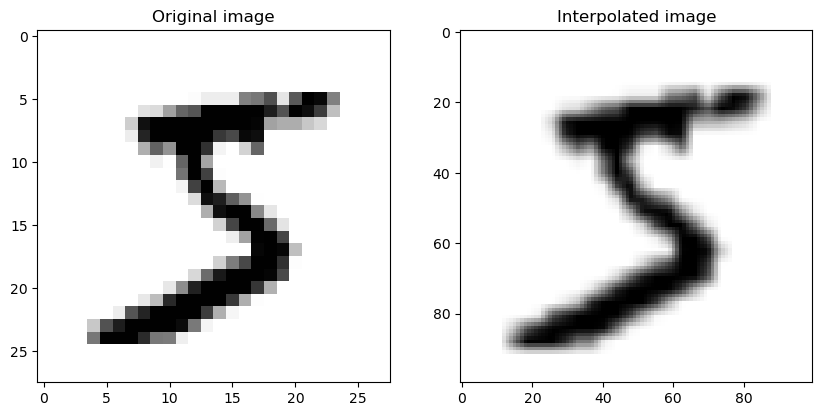

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(i1, cmap='gray_r')
plt.title('Original image')
plt.subplot(122)
plt.imshow(i1_new, cmap='gray_r')
plt.title('Interpolated image')
plt.show()

In [24]:
# create new images with 100x100 pixels for each image in the training set and test set
x_train_new = np.zeros((len(x_train), 100, 100))
x_test_new = np.zeros((len(x_test), 100, 100))

for i in range(1600):
    x_train_new[i] = augment_image(x_train[i])

for i in range(1600):
    x_test_new[i] = augment_image(x_test[i])

In [191]:
errors_h1_augmented = []
dist_matrix_h1_augmented = h1_distance_matrix(x_train_new, 1600)

for n in [100, 200, 400, 800, 1600]:
    errors_h1_augmented.append(leave_one_out_error_rate_optimized(dist_matrix_h1_augmented[:n, :n], y_train[:n]))
    
print(errors_h1_augmented)

[0.18, 0.13, 0.1025, 0.10625, 0.083125]


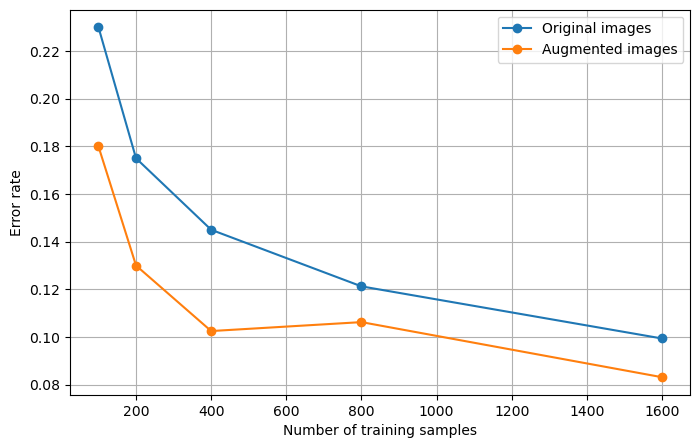

In [29]:
plt.figure(figsize=(8,5))
plt.plot(n_samples, errors_h1, 'o-')
plt.plot(n_samples, errors_h1_augmented, 'o-')
plt.legend(['Original images', 'Augmented images'])
plt.xlabel('Number of training samples')
plt.ylabel('Error rate')
plt.grid()
plt.show()

## Assigment 7

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses a distance from the steps defined above**.

For N in `[3200, 6400]` and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.

In [30]:
from sklearn.neighbors import BallTree

mytree = BallTree(x_train[:1000].reshape(1000, 28*28), metric=d_2)
tree = BallTree(x_train[:1000].reshape(1000, 28*28), metric='l2')

In [32]:
from collections import Counter

def majority_vote(y):
    return Counter(y).most_common(1)[0][0]

def compute_efficiency_knn(tree, y_train, x_test, y_test, k):

    error_counter = 0

    x_test = x_test.reshape(x_test.shape[0], -1)

    _, ind = tree.query(x_test, k=k)

    for i in range(len(x_test)):
        predicted_label = majority_vote(y_train[ind][i])

        if predicted_label != y_test[i]:
            error_counter += 1

    efficiency = error_counter / x_test.shape[0]
    return efficiency

In [ ]:
dist_funcs = [d_infty, d_1, d_2, h1_distance]
n_samples = [100, 200, 400, 800, 1600]
efficiencies = []

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

for dist_func in dist_funcs:    
    temp_efficiencies = []
    for N in n_samples:
        tree = BallTree(x_train_reshaped[:N], metric=dist_func)
        eff = compute_efficiency_knn(tree, y_train[:N], x_test[:N], y_test[:N], 1)
        temp_efficiencies.append(eff)
        print(f'N = {N}: efficiency = {eff}')
    
    efficiencies.append(temp_efficiencies)

In [9]:
# To avoid rerunning the code above, we save the results here:
efficiencies = [[0.71, 0.625, 0.5625, 0.55125, 0.47375],
 [0.35, 0.315, 0.2375, 0.19125, 0.159375],
 [0.33, 0.315, 0.2275, 0.1825, 0.145625],
 [0.27, 0.24, 0.195, 0.155, 0.14]]

n_samples = [100, 200, 400, 800, 1600]

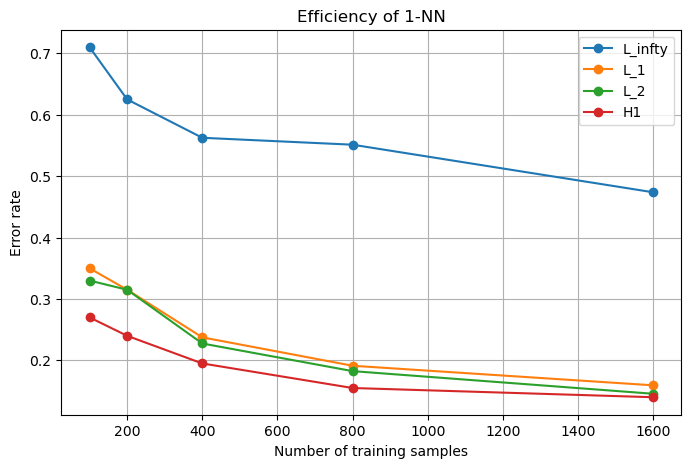

In [10]:
plt.figure(figsize=(8,5))
plt.plot(n_samples, efficiencies[0], 'o-')
plt.plot(n_samples, efficiencies[1], 'o-')
plt.plot(n_samples, efficiencies[2], 'o-')
plt.plot(n_samples, efficiencies[3], 'o-')
plt.legend(['L_infty', 'L_1', 'L_2', 'H1'])
plt.xlabel('Number of training samples')
plt.ylabel('Error rate')
plt.title('Efficiency of 1-NN')
plt.grid()
plt.show()

 We can notice that the $H^1$ is more reliable in the case of a small number of samples but it is also much slower to compute. The $L^2$ norm is much faster to compute and it becomes as reliable for a large number of samples.

In [38]:
N = 400
tree = BallTree(x_train[:N].reshape(N, 28*28), metric=h1_distance)
%timeit compute_efficiency_knn(tree, y_train[:N], x_test[:N], y_test[:N], 10)

eff = compute_efficiency_knn(tree, y_train[:N], x_test[:N], y_test[:N], 10)
eff

20.9 s ± 2.47 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.2725

In [88]:
n_samples = [100, 200, 400, 800, 1600]
distances = [d_infty, d_1, d_2, h1_distance] 
neighbors = [1, 2, 5, 10]

error_rates = {d.__name__: {k: [] for k in neighbors} for d in distances}

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

for d in distances:
  for N in n_samples:
    tree = BallTree(x_train_reshaped[:N], metric=d)
    for k in neighbors:
      k_err = compute_efficiency_knn(tree, y_train[:N], x_test[:N], y_test[:N], k)
      error_rates[d.__name__][k].append(k_err)

In [89]:
error_rates # in the form {distance: {k: [error_rates for different numbers of training samples]}}

{'d_infty': {1: [0.71, 0.625, 0.5625, 0.55125, 0.47375],
  2: [0.64, 0.57, 0.5425, 0.52375, 0.4875],
  5: [0.61, 0.595, 0.53, 0.52, 0.46875],
  10: [0.61, 0.58, 0.55, 0.5175, 0.465625]},
 'd_1': {1: [0.35, 0.315, 0.2375, 0.19125, 0.159375],
  2: [0.35, 0.315, 0.2375, 0.19125, 0.159375],
  5: [0.35, 0.34, 0.2575, 0.21875, 0.171875],
  10: [0.35, 0.36, 0.295, 0.21625, 0.1825]},
 'd_2': {1: [0.33, 0.315, 0.2275, 0.1825, 0.145625],
  2: [0.33, 0.315, 0.2275, 0.1825, 0.145625],
  5: [0.35, 0.315, 0.2725, 0.19625, 0.151875],
  10: [0.34, 0.345, 0.2875, 0.20125, 0.1675]},
 'h1_distance': {1: [0.27, 0.24, 0.195, 0.155, 0.14],
  2: [0.27, 0.24, 0.195, 0.155, 0.14],
  5: [0.3, 0.295, 0.2175, 0.17, 0.14625],
  10: [0.45, 0.355, 0.2725, 0.18125, 0.15125]}}

### Error rate vs number of samples for different number of neighbors

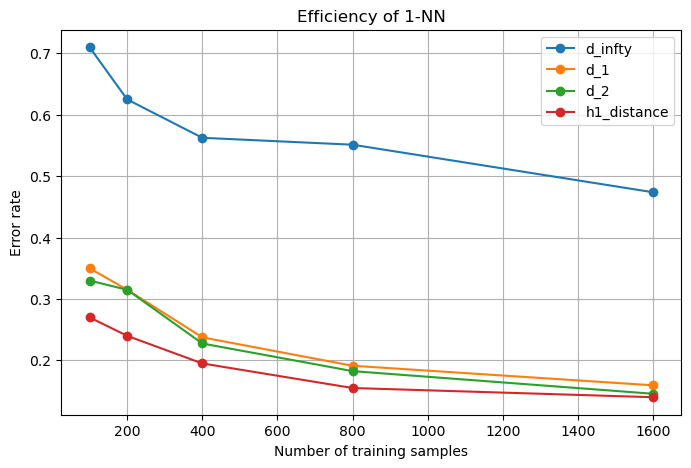

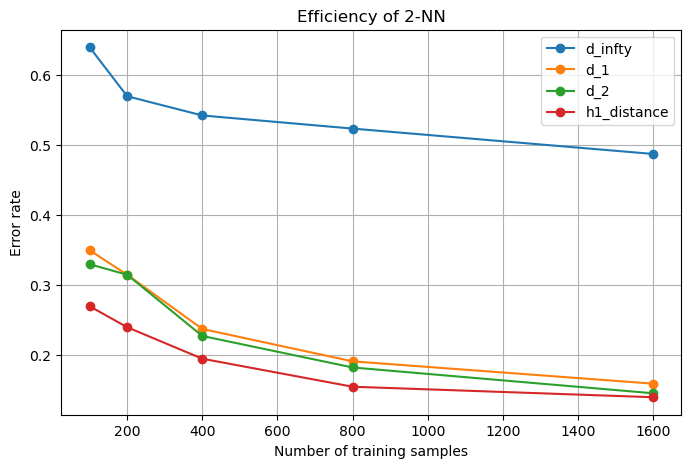

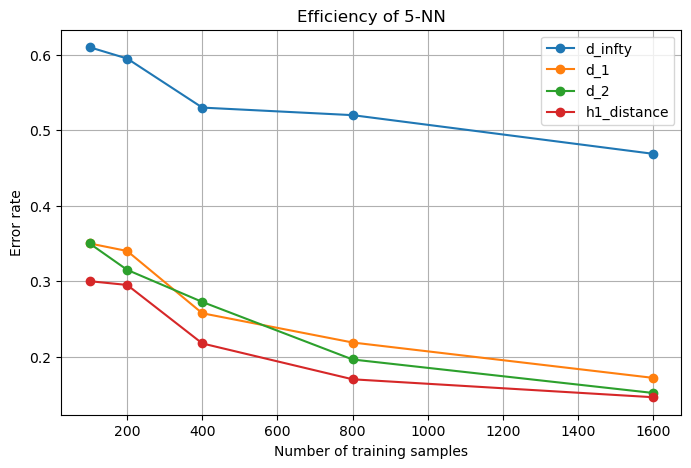

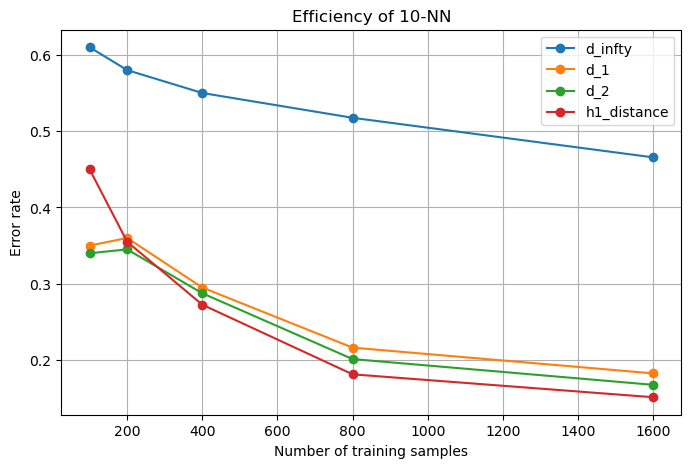

In [97]:
for k in neighbors:
  plt.figure(figsize=(8,5))
  for d in distances:
    plt.plot(n_samples, error_rates[d.__name__][k], 'o-')
  plt.legend([d.__name__ for d in distances])
  plt.xlabel('Number of training samples')
  plt.ylabel('Error rate')
  plt.title(f'Efficiency of {k}-NN')
  plt.grid()
  plt.show()

### Error rate vs number of neighbors for different number of samples

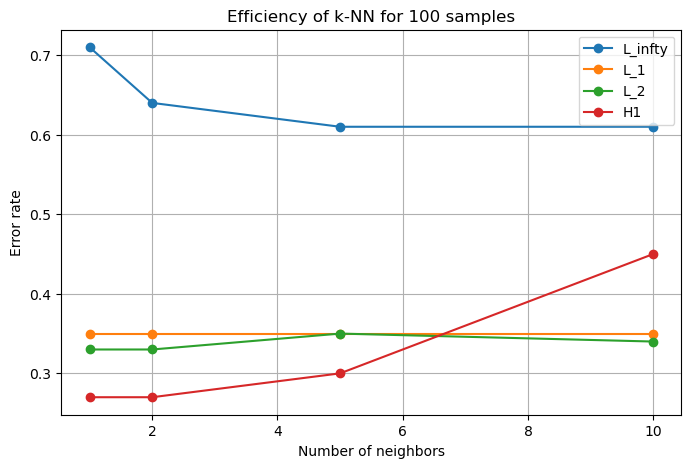

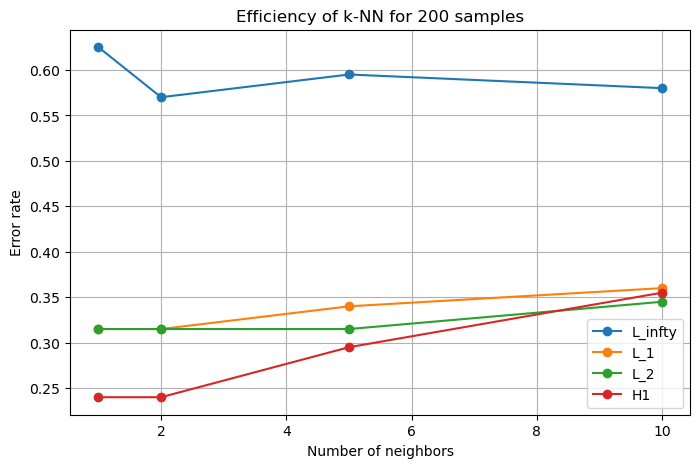

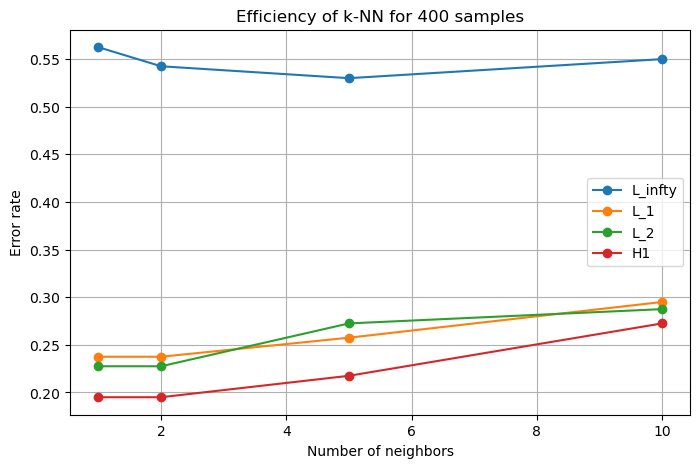

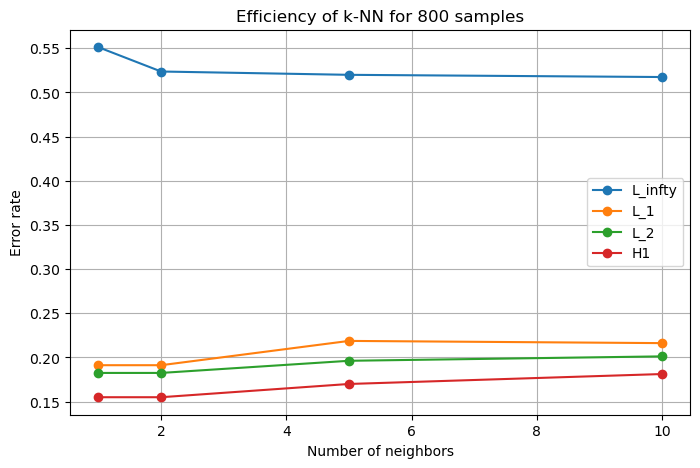

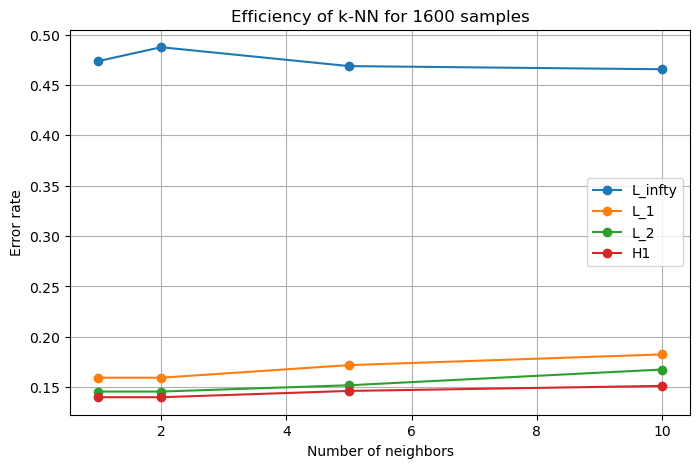

In [104]:
for i in range(5):
    d_N = [[error_rates[d.__name__][k][i] for k in neighbors] for d in distances]
    plt.figure(figsize=(8,5))
    for j in range(4):
        plt.plot(neighbors, d_N[j], 'o-')
    plt.legend(['L_infty', 'L_1', 'L_2', 'H1'])
    plt.xlabel('Number of neighbors')
    plt.ylabel('Error rate')
    plt.title(f'Efficiency of k-NN for {n_samples[i]} samples')
    plt.grid()
    plt.show()

## Conclusions

As stated for the 1-NN case, the $H^1$ norm remains the more reliable even for the $k$-NN case. \
The $L^2$ norm still works really well even with different values of $k$. \
The choice of $k$ has a significant impact on the model's flexibility, accuracy, and generalization.
- Low $k$: the model is flexible and tends to fit the training data closely. This can make it prone to noise and outliers, potentially leading to overfitting. 
- High $k$: the model considers a larger neighborhood of data points when making predictions, which results in a smoother decision boundary. This makes the model more robust to noise and outliers and improves its ability to generalize to unseen data. \

It's important to note that the MNIST dataset is purposefully designed for evaluating machine learning algorithms, and as a result, it contains minimal noise and outliers. This characteristic tends to favor models with low values of $k$, as they can achieve higher accuracy compared to models with higher $k$ values.